## 순서가 없는 범주형 특성 인코딩하기


In [2]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

In [3]:
feature = np.array([['Texas'],['California'],['Texas'],['Delaware'],['Texas']])

In [4]:
#원핫인코딩
one_hot= LabelBinarizer()

In [5]:
one_hot.fit_transform(feature)

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [6]:
one_hot.classes_

array(['California', 'Delaware', 'Texas'], dtype='<U10')

In [8]:
import pandas as pd
dataframe = pd.DataFrame({'Score':['low','low','medium','medium','high']})

In [9]:
#replace를 이용해 딕셔너리 매핑을 통해 value 리턴
scale_mapper={'low':1,'medium':2,'high':3}
dataframe['Score'].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: Score, dtype: int64

In [10]:
from sklearn.feature_extraction import DictVectorizer

In [11]:
data_dict=[{'Red':2 , "Blue":4},
          {'Red':4, 'Blue':3},
          {'Red':1, "Yellow":2},
          {'Red':2, "Yellow":2}]

In [12]:
dictvectorizer= DictVectorizer(sparse=False)

In [13]:
features = dictvectorizer.fit_transform(data_dict)
features

array([[4., 2., 0.],
       [3., 4., 0.],
       [0., 1., 2.],
       [0., 2., 2.]])

## 누락된 클래스 값 대체하기

In [15]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [16]:
X= np.array([[0, 2.10, 1.45],
            [1, 1.18, 1.33],
            [0, 1.22, 1.27],
            [1, -0.21, -1.19]])

In [17]:
#누락값있는 데이터 첫 열(타겟 열을 예측해서 집어넣으려 함.)
X_with_nan = np.array([[np.nan, 0.87, 1.31],
                      [np.nan, -0.67, -0.22]])

In [18]:
#k KNN 알고리즘을 통해 훈련
clf = KNeighborsClassifier(3, weights='distance')
trained_model = clf.fit(X[:,1:], X[:,0])

In [29]:
#predict를 통한 예측

imputed_values= trained_model.predict(X_with_nan[:,1:])
imputed_values.reshape(-1,1)

array([[0.],
       [1.]])

In [31]:
X_with_imputed = np.hstack((imputed_values.reshape(-1,1), X_with_nan[:,1:]))
X_with_imputed

array([[ 0.  ,  0.87,  1.31],
       [ 1.  , -0.67, -0.22]])

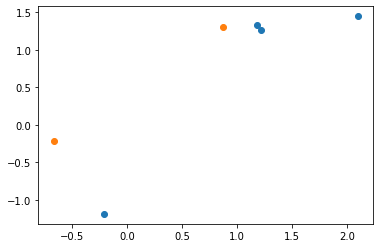

In [24]:
df_X= pd.DataFrame(X)
df_Xnan = pd.DataFrame(X_with_nan)
df_Xnan
import matplotlib.pyplot as plt
plt.scatter(df_X[1], df_X[2])
plt.scatter(df_Xnan[1], df_Xnan[2])

## 불균형한 클래스 다루기

In [20]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_iris

In [21]:
iris = load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
features= iris.data
target= iris.target

In [25]:
features.shape, target.shape

((150, 4), (150,))

In [26]:
# 40개의 데이터를 삭제한다.
features=features[40:,:]
target= target[40:]


In [27]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
#이진 타겟 벡터를 만들어라 
# setosa 그룹(0) 과 아닌 그룹(1)로 나눈다. target_names로 각각이 무엇인지 우선 알아내자.
target = np.where((target==0),0,1)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
#가중치를 만들자 (1. 직접설정)
weights= {0:0.9, 1:0.1}
RandomForestClassifier(class_weight= weights)

RandomForestClassifier(class_weight={0: 0.9, 1: 0.1})

In [30]:
#가중치를 만들자 (2. balanced를 이용해 빈도가 낮은 클래스에 많은 가중치를 줘서 클래스 간 불균형을 해소하자.-> 모델의 예측력을 높이고 /overfitting 해소)

RandomForestClassifier(class_weight= 'balanced')

RandomForestClassifier(class_weight='balanced')

In [44]:
# 각각 target이 0인 인덱스들, target이 1인 샘플들의 인덱스들이 담겨있다.

i_class0= np.where(target==0)[0]
i_class1= np.where(target==1)[0] # [0]을 안하면 튜플로 묶여있어서 [0]으로 array꼴로 나오게 해준다.

In [45]:
n_class0=len(i_class0)
n_class1=len(i_class1)

In [47]:
# 클래스 0 의 샘플만큼 클래스 1에서 중복을 허용하지 않고 랜덤하게 샘플을 뽑는다.
# 다운 샘플링( 다수 클래스에서 소수 클래스의 개수 만큼만 뽑는다.)
# replace 가 true이면 복원추출이 되고, false이면 뽑힌 것은 다시 뽑히지 않는다.

i_class1_downsampled = np.random.choice(i_class1, size= n_class0, replace=False )
i_class1_downsampled

array([59, 46, 12, 27, 10, 91, 98, 26, 96, 70], dtype=int64)

In [49]:
np.hstack((target[i_class0], target[i_class1_downsampled]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
np.vstack((features[i_class0,:], features[i_class1_downsampled,:]))[0:5]

array([[5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4]])

## 불균형한 클래스 다루는 법

1. 소수 클래스의 샘플을 많이 모으기 (가장 좋지만 가장 힘듦)
2. 불균형한 클래스에 잘 맞는 모델 평가 지표 (오차행렬, 정밀도, 재현율, F1점수, ROC곡선)
3. 클래스 가중치 매개변수
4. 다운샘플링 업샘플링